In [601]:
import pandas
import matplotlib.pyplot as pyplot
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [602]:
clean_dataset = pandas.read_csv('df_banco_final.csv', sep=';')

In [603]:
y = clean_dataset['default']
x = clean_dataset.drop('default', axis=1)

In [604]:
x.head()

,account_check_status,credit_history,savings,present_emp_since,installment_as_income_perc,other_debtors,property,other_installment_plans,housing,credits_this_bank,job,telephone,foreign_worker,estado_civil,rango_plazos_credito,rango_edad
0,1,5,1,1,4,1,1,3,2,2,3,1,1,1,1,5
1,2,3,5,3,2,1,1,3,2,1,3,0,1,0,4,1
2,4,5,5,2,2,1,1,3,2,1,2,0,1,1,1,3
3,1,3,5,2,2,3,2,3,3,1,3,0,1,1,4,3
4,1,4,5,3,3,1,4,3,3,2,3,0,1,1,2,4


In [605]:

normalizer = StandardScaler()
x_normalized = normalizer.fit_transform(x)

In [606]:
x_normalized

array([[-1.06271653,  1.50687935, -2.01779722, ...,  1.06039189,
        -1.05547493,  2.80548   ],
       [-0.25059691, -0.33157912,  0.68482522, ..., -0.94304758,
         1.95811766, -0.85668504],
       [ 1.37364232,  1.50687935,  0.68482522, ...,  1.06039189,
        -1.05547493,  0.97439748],
       ...,
       [-1.06271653, -2.17003758,  0.68482522, ..., -0.94304758,
        -1.05547493, -0.85668504],
       [-0.25059691, -0.33157912,  0.68482522, ..., -0.94304758,
        -0.05094407, -0.85668504],
       [-1.06271653, -0.33157912,  0.68482522, ..., -0.94304758,
        -1.05547493, -0.85668504]])

In [607]:
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.3, random_state=123)

In [608]:
mediana = np.median(x_train)
mediana

0.05434583202464159

In [609]:
x_train_binarizado = np.where(x_train > mediana, 1, 0)
x_train_binarizado

array([[0, 1, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 0, 1]])

In [610]:
#entrenando el modelo
bnb = BernoulliNB()
bnb.fit(x_train_binarizado, y_train)

BernoulliNB()

In [611]:
#Binarizando la base de prueba
X_test_binarizado = np.where(x_test > np.median(x_test), 1, 0)
X_test_binarizado

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 1, 0]])

In [612]:
predictions = bnb.predict(X_test_binarizado)
predictions

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,

## Evaluamos el modelo

### Matriz de confusión

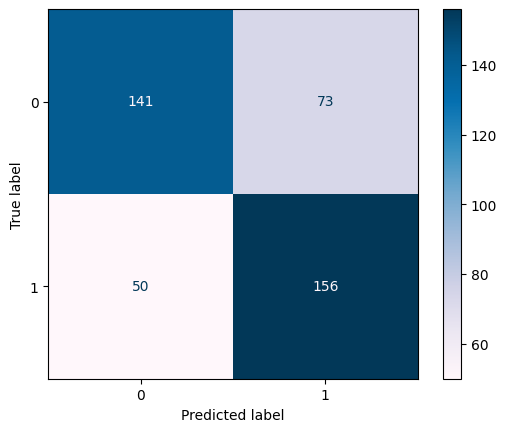

In [613]:
confmatrix = confusion_matrix(y_test, predictions)
confmatrix

visual_confmatrix = ConfusionMatrixDisplay(confmatrix)
visual_confmatrix.plot(cmap='PuBu')

In [614]:
confmatrix

array([[141,  73],
       [ 50, 156]], dtype=int64)

In [615]:
tn = confmatrix[0][0]
fp = confmatrix[0][1]
specificity = tn/(tn + fp)
specificity

0.6588785046728972

In [616]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
rocauc = roc_auc_score(y_test, predictions)


In [617]:
model_scores = {
  'model': 'Naive_Bayes(Bernulli_NB)',
  'accuracy': accuracy,
  'precision': precision,
  'recall': recall,
  'f1_score': f1,
  'roc_auc_score': rocauc,
  'specificity' : specificity
}
model_scores

{'model': 'Naive_Bayes(Bernulli_NB)',
 'accuracy': 0.7071428571428572,
 'precision': 0.6812227074235808,
 'recall': 0.7572815533980582,
 'f1_score': 0.7172413793103449,
 'roc_auc_score': 0.7080800290354777,
 'specificity': 0.6588785046728972}

In [618]:
def save_scores(model_scores: dict):
  status = []
  #Utilizamos un try-except en caso de que el archivo no exista que cree uno
  try:
    #Si el archivo existe continúa por acá
    scores = pandas.read_csv('scores.csv', sep=';')
    status.append('El archivo existe')
    exist = model_scores['model'] in scores['model'].values
    #Validamos si el modelo ya existe en el archivo de scores
    if (exist):
      #Si el modelo ya existe reemplazamos sus valores
      status.append('El modelo existe')
      criteria = scores['model'] == model_scores['model']
      index = scores[criteria].index[0]
      scores.iloc[index] = model_scores
      status.append('Se reemplazaron los valores del modelo')
    else:
      #Si el modelo no existe lo agregamos
      status.append('El modelo no existe')
      df_model_scores = pandas.DataFrame(model_scores, index=[0])
      scores = pandas.concat([scores, df_model_scores], ignore_index=True)
      status.append('Se añadió modelo nuevo y sus valores')
  except:
    #Si no existe el archivo lo creamos y cargamos los scores del modelo
    status.append('El archivo no existe')
    scores = pandas.DataFrame(model_scores, index=[0])

  status.append('Se sobrescrive el archivo scores.csv con valores nuevos')
  scores.to_csv('scores.csv', sep=';', index=False)
  return status

In [619]:
save_scores(model_scores)

['El archivo existe',
 'El modelo existe',
 'Se reemplazaron los valores del modelo',
 'Se sobrescrive el archivo scores.csv con valores nuevos']

In [633]:
#instancia de kfolds
kfolds = KFold(n_splits=5, shuffle=True)

In [634]:
#aplicación de Cross validation
accuracy_crossval = cross_val_score(
  estimator=bnb,
  X=x_train_binarizado,
  y=y_train,
  scoring='accuracy',
  cv=kfolds
)
accuracy_crossval.mean()

0.7408163265306122

In [635]:
bnb_hiperparams = {
  'alpha': [1e-10, 0.1, 0.5, 1.0, 1.5, 2.0],  
  'force_alpha': [False,True],
  'binarize': [None, 0.0, 0.5], 
  'fit_prior': [True, False],
  'class_prior': [None, [0.3, 0.7], [0.2, 0.8]],
}

In [636]:
randomsearch_bnb_model = RandomizedSearchCV(
  bnb,
  bnb_hiperparams,
  n_iter=216,
  cv=kfolds,
  scoring='accuracy',
  n_jobs=-1
)

In [637]:
randomsearch_fit = randomsearch_bnb_model.fit(x_train_binarizado, y_train)

In [638]:
randomsearch_fit.best_score_

0.7510204081632652

In [639]:
randomsearch_fit.best_params_

{'force_alpha': False,
 'fit_prior': True,
 'class_prior': None,
 'binarize': None,
 'alpha': 2.0}

In [640]:
bnb_optimized = BernoulliNB(force_alpha = False,
 fit_prior =True,
 class_prior = None,
 binarize = None,
 alpha = 2.0)
bnb_optimized.fit(x_train_binarizado, y_train)
bnb_optimized_predictions = bnb_optimized.predict(X_test_binarizado)

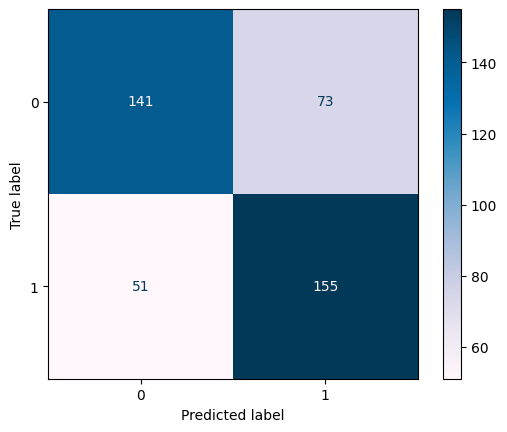

In [641]:
confmatrix = confusion_matrix(y_test, bnb_optimized_predictions)
confmatrix

visual_confmatrix = ConfusionMatrixDisplay(confmatrix)
visual_confmatrix.plot(cmap='PuBu')

In [642]:
accuracy = accuracy_score(y_test, bnb_optimized_predictions)
precision = precision_score(y_test, bnb_optimized_predictions)
recall = recall_score(y_test, bnb_optimized_predictions)
f1 = f1_score(y_test, bnb_optimized_predictions)
rocauc = roc_auc_score(y_test, bnb_optimized_predictions)
tn = confmatrix[0][0]
fp = confmatrix[0][1]
specificity = tn/(tn + fp)

In [643]:
model_scores = {
  'model': 'Naive_Bayes(Bernulli_NB)_optimized',
  'accuracy': accuracy,
  'precision': precision,
  'recall': recall,
  'f1_score': f1,
  'roc_auc_score': rocauc,
  'specificity' : specificity
}
model_scores

{'model': 'Naive_Bayes(Bernulli_NB)_optimized',
 'accuracy': 0.7047619047619048,
 'precision': 0.6798245614035088,
 'recall': 0.7524271844660194,
 'f1_score': 0.7142857142857143,
 'roc_auc_score': 0.7056528445694583,
 'specificity': 0.6588785046728972}

In [631]:
save_scores(model_scores)

['El archivo existe',
 'El modelo existe',
 'Se reemplazaron los valores del modelo',
 'Se sobrescrive el archivo scores.csv con valores nuevos']